In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dm-fedorov/python_basic/master/data/vkontakte_group_01_2016-08-01_2020-03-15.csv")
df.head()

,Дата,Критерий,Парам. №1,Парам. №2,Значение
0,15.03.2020,views,NaN,NaN,4
1,15.03.2020,visitors,NaN,NaN,3
2,15.03.2020,gender,М,NaN,3
3,15.03.2020,age,24-27,NaN,1
4,15.03.2020,age,30-35,NaN,2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/dm-fedorov/python_basic/master/data/vkontakte_group_01_2016-08-01_2020-03-15.csv")

def group_by_time(row):
    return datetime.strptime(row['Дата'], '%d.%m.%Y').strftime('%Y')

df['Дата'] = df.apply(group_by_time, axis=1)

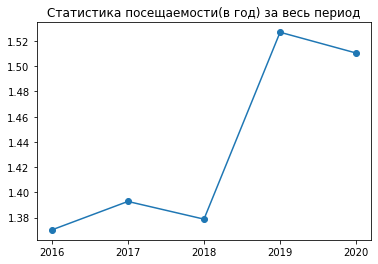

In [3]:
# задача 1 - определить статистику посещаемости группы (просмотры/посещения в год)

mean_values = df[df.Критерий == 'views'].groupby(['Дата'])['Значение'].sum() / df[df.Критерий == 'visitors'].groupby(['Дата'])['Значение'].sum()
plt.title('Статистика посещаемости(в год) за весь период')
plt.plot(mean_values, marker='o')
plt.show()

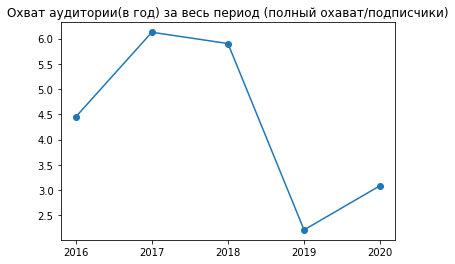

In [4]:
# задача 2 - провести анализ охвата аудитории (reach/reach_subscribers)

audience_reach = df[df.Критерий == 'reach'].groupby(['Дата'])['Значение'].sum()
audience_reach_subscribers = df[df.Критерий == 'reach_subscribers'].groupby(['Дата'])['Значение'].sum()
audience_range = audience_reach / audience_reach_subscribers
plt.title('Oхват аудитории(в год) за весь период (полный охават/подписчики)')
plt.plot(audience_range, marker='o')
plt.show()

In [5]:
# задача 3 - провести анализ демографии (пол - gender, возраст аудитории - age, gender_age, страна - countries)

men = len(df[(df.Критерий == 'gender') & (df['Парам. №1'] == 'М')])
women = len(df[(df.Критерий == 'gender') & (df['Парам. №1'] == 'Ж')])
mean_age = df[df.Критерий == 'age']['Парам. №1'].value_counts()
men_mean_age = df[(df.Критерий == 'gender_age') & (df['Парам. №1'] == 'М')]['Парам. №2'].value_counts()
women_mean_age = df[(df.Критерий == 'gender_age') & (df['Парам. №1'] == 'Ж')]['Парам. №2'].value_counts()
countries = df[df.Критерий == 'countries']['Парам. №1'].value_counts()

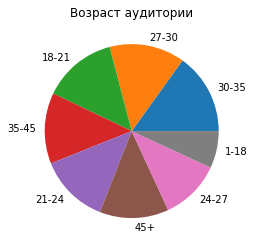

In [6]:
plt.title('Возраст аудитории')
plt.pie(mean_age, labels = mean_age.index)
plt.show()

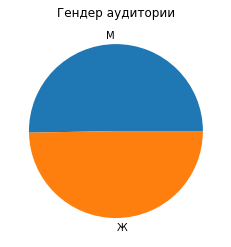

In [7]:
plt.title('Гендер аудитории')
plt.pie([men, women], labels = ["М","Ж"])
plt.show()

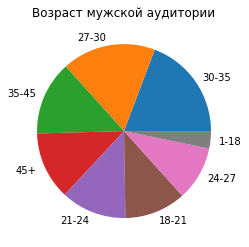

In [8]:
plt.title('Возраст мужской аудитории')
plt.pie(men_mean_age, labels = men_mean_age.index)
plt.show()

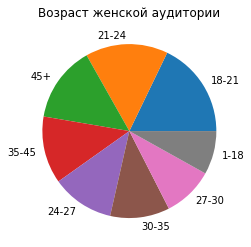

In [9]:
plt.title('Возраст женской аудитории')
plt.pie(women_mean_age, labels = women_mean_age.index)
plt.show()

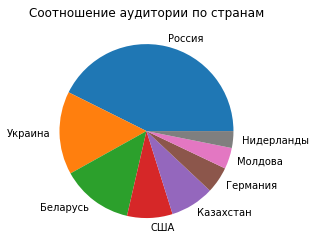

In [10]:
plt.title('Соотношение аудитории по странам')
n = 50
plt.pie([i for i in countries if i > n], labels = [i for i in countries.index if countries[i] > n])
plt.show()
# взял те страны со значимой статистикой (количество пользователей >n)

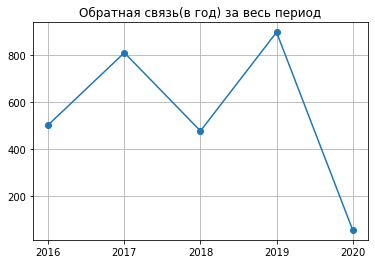

In [11]:
# задача 4 - провести анализ обратной связи.

total_feedback = df[df.Критерий == 'feedback'].groupby(['Дата'])['Значение'].sum()
plt.title("Обратная связь(в год) за весь период")
plt.plot(total_feedback, marker='o')
plt.grid(True)
plt.show()

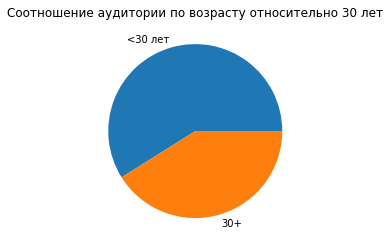

In [12]:
# задача 5 - обосновать, подходит ли данная группа для продвижения нового товара среди активных пользователей из России моложе 30 лет?

younger = 0
older = 0
for i in range(len(mean_age)):
    if int(mean_age.index[i].split('-')[-1][:2]) <= 30:
        younger += mean_age[i]
    else:
        older += mean_age[i]

plt.title('Соотношение аудитории по возрасту относительно 30 лет')
plt.pie([younger, older], labels = ["<30 лет", "30+"])
plt.show()
# чуть больше половины аудитории группы моложе 30 лет => лучше подыскать группу с целевой аудиторией, где хотя бы 75% моложе 30 лет